In [1]:
import glob
#!pip install numpy==1.21.1
import numpy as numpy
%config Completer.use_jedi = False
import _pickle as cPickle

# Dumping Embeddings for test sessions

In [2]:
from rawGenerator import rawGenerator
def get_feats(path):
    r = rawGenerator(path, mode='test')
    test =[]
    for w,feat,l in r:
        test.append((w, feat, l))
    return test

In [3]:
import keras
def get_embeddings(models, data):
    #/idiap/temp/tpurohit/IEMOCAP-SD/exp/exp_f1/cnn_subseg_1/cnn.h5
    model_path = "/idiap/temp/tpurohit/IEMOCAP-SD/exp/exp_"+models+"/cnn_subseg_1/cnn.h5"
    m = keras.models.load_model(model_path) 
    print("Loaded model: {}\n".format("exp_"+models+"/cnn_subseg_1/cnn.h5"))
    
    ############### defining new model to get intermediate reprasentation #############
    print("New model creation...")
    print(m.layers[13].name)
    layer_name = m.layers[13].name
    layer_output=m.get_layer(layer_name).output
    intermediate_model=keras.models.Model(inputs=m.input,outputs=layer_output)
    print(intermediate_model.summary()) # Sanity Check print the model
    print("New model created...")
    ###################################################################################
    print("Fetching intermediate reprasentations...")
    embeddings = []
    for i in range (0, len(data)):
        utterance = i
        uttr_path = data[utterance][0] #path (string) 
        uttr_feat = data[utterance][1] #features(n X 4000)
        uttr_labl = data[utterance][2] #lables (n X 1)
        intermediate_prediction=intermediate_model.predict(uttr_feat)
        embeddings.append((uttr_path,uttr_labl,intermediate_prediction))
    print("All embeddings created...")
    print ("Total utterance embeddings = {} \n".format(len(embeddings)))
    return embeddings

In [4]:
model_ids = ['f1','f2', 'f3', 'f4', 'f5']
F_IDs = ['F1', 'F2', 'F3', 'F4', 'F5']

for models in model_ids: 
    for fold_id in F_IDs:
        #fold_id = 'F1'  # F1, F2, F3, F4, F5
        session_id = {'F1':'5', 'F2':'4', 'F3':'3','F4':'2', 'F5':'1'}
        # "/idiap/temp/tpurohit/IEMOCAP-SD/feat/F1/test_feat"
        path = "/idiap/temp/tpurohit/IEMOCAP-SD/feat/"+fold_id+"/test_feat/"
        print("Fold ID: {}\nSession ID: Session{}".format(fold_id,session_id[fold_id]))
        data = get_feats(path)
        print("Total utterances dumped = {} \n".format(len(data)))
        
        embeddings = get_embeddings(models, data)

        print("Saving dump for model {}".format(models))
        #/idiap/temp/tpurohit/IEMOCAP-SD/Embeddings_RELU
        pickle_sav_path ="/idiap/temp/tpurohit/IEMOCAP-SD/Embeddings_RELU/"+models+"/"
        with open(r"/"+pickle_sav_path+"Session_"+session_id[fold_id]+".pickle", "wb") as output_file:
            cPickle.dump(embeddings, output_file)
        print("Session{} embeddings completed \n\n".format(session_id[fold_id]))
    print("Model {} is complete \n\n".format(models))

Fold ID: F1
Session ID: Session5
Total utterances dumped = 1107 

Loaded model: exp_f1/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 256

All embeddings created...
Total utterance embeddings = 1106 

Saving dump for model f1
Session2 embeddings completed 


Fold ID: F5
Session ID: Session1
Total utterances dumped = 1106 

Loaded model: exp_f1/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          

Total utterances dumped = 1106 

Loaded model: exp_f2/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 256)           327936    
_________

All embeddings created...
Total utterance embeddings = 1107 

Saving dump for model f3
Session5 embeddings completed 


Fold ID: F2
Session ID: Session4
Total utterances dumped = 1106 

Loaded model: exp_f3/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)         

Loaded model: exp_f3/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 256)           327936    
__________________________________________

All embeddings created...
Total utterance embeddings = 1106 

Saving dump for model f4
Session3 embeddings completed 


Fold ID: F4
Session ID: Session2
Total utterances dumped = 1106 

Loaded model: exp_f4/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)         

Total utterances dumped = 1106 

Loaded model: exp_f5/cnn_subseg_1/cnn.h5

New model creation...
activation_5
Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1_input (InputLayer) [(None, 4000)]            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 256)           327936    
_________

All embeddings created...
Total utterance embeddings = 1106 

Saving dump for model f5
Session1 embeddings completed 


Model f5 is complete 




# Txt format conversion :

In [5]:
def get_list(sav_path, embd_data): 
    with open(sav_path, 'a') as f:
        for i in range (0, len(embd_data)):
            utter = i
            uttr_nom = embd_data[utter][0]
            uttr_lable = embd_data[utter][1]
            uttr_feat = embd_data[utter][2]
            for j in range (0, uttr_feat.shape[0]):
                f.write("%s %s %s %s %s %s %s %s %s %s %s %s %s\n" %(uttr_nom, j, uttr_lable[j], uttr_feat[j][0],uttr_feat[j][1], uttr_feat[j][2], uttr_feat[j][3],uttr_feat[j][4], uttr_feat[j][5], uttr_feat[j][6],uttr_feat[j][7], uttr_feat[j][8], uttr_feat[j][9]))
                #f.write("%s %s %s %s %s %s %s %s %s %s %s %s\n" %(0, j, uttr_feat[j][0],uttr_feat[j][1], uttr_feat[j][2], uttr_feat[j][3],uttr_feat[j][4], uttr_feat[j][5], uttr_feat[j][6],uttr_feat[j][7], uttr_feat[j][8], uttr_feat[j][9]))

    f.close()
    return

In [6]:
model = ['f1', 'f2', 'f3', 'f4', 'f5']

for m in model:
    print("For model {}".format(m))
    for s in range (1,6):
        print("Session {}".format(s))
        #"/idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_2/Exp_2/Embeddings_Relu/f1/Session_1.pickle"
        embedd_dump_path= "/idiap/temp/tpurohit/IEMOCAP-SD/Embeddings_RELU/"+m+"/Session_"+str(s)+".pickle"
        with open(r'/'+embedd_dump_path, "rb") as input_file:
            embd_data = cPickle.load(input_file)
        sav_path= "/idiap/temp/tpurohit/IEMOCAP-SD/Embeddings_RELU/"+m+"/Session_"+str(s)+".list"
        get_list(sav_path, embd_data)
        print("Session complete...")
    print("All sessions for model {} completed...\n\n".format(m))

For model f1
Session 1
Session complete...
Session 2
Session complete...
Session 3
Session complete...
Session 4
Session complete...
Session 5
Session complete...
All sessions for model f1 completed...


For model f2
Session 1
Session complete...
Session 2
Session complete...
Session 3
Session complete...
Session 4
Session complete...
Session 5
Session complete...
All sessions for model f2 completed...


For model f3
Session 1
Session complete...
Session 2
Session complete...
Session 3
Session complete...
Session 4
Session complete...
Session 5
Session complete...
All sessions for model f3 completed...


For model f4
Session 1
Session complete...
Session 2
Session complete...
Session 3
Session complete...
Session 4
Session complete...
Session 5
Session complete...
All sessions for model f4 completed...


For model f5
Session 1
Session complete...
Session 2
Session complete...
Session 3
Session complete...
Session 4
Session complete...
Session 5
Session complete...
All sessions for mode

# Tsne For 5 fold test data

In [8]:
embedd_m1_path= "idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Embeddings/f1/Session_5.pickle"
embedd_m2_path= "idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Embeddings/f2/Session_4.pickle"
embedd_m3_path= "idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Embeddings/f3/Session_3.pickle"
embedd_m4_path= "idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Embeddings/f4/Session_2.pickle"
embedd_m5_path= "idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Embeddings/f5/Session_1.pickle"

with open(r'/'+embedd_m1_path, "rb") as input_file1:
    embd_m1 = cPickle.load(input_file1)
with open(r'/'+embedd_m2_path, "rb") as input_file2:
    embd_m2 = cPickle.load(input_file2)
with open(r'/'+embedd_m3_path, "rb") as input_file3:
    embd_m3 = cPickle.load(input_file3)
with open(r'/'+embedd_m4_path, "rb") as input_file4:
    embd_m4 = cPickle.load(input_file4)
with open(r'/'+embedd_m5_path, "rb") as input_file5:
    embd_m5 = cPickle.load(input_file5)

In [9]:
print("Session5:{} Session4:{} Session3:{} Session2: {} Session1: {}".format(len(embd_m1),len(embd_m2),len(embd_m3),len(embd_m4),len(embd_m5)))

Session5:1241 Session4:1031 Session3:1151 Session2: 1023 Session1: 1085


In [10]:
X_embd = []
Y_embd= []
for em in embd_m1:
    X_embd.append(em[2])
    Y_embd.append(numpy.reshape(em[1],(em[1].shape[0],1)))
for em in embd_m2:
    X_embd.append(em[2])
    Y_embd.append(numpy.reshape(em[1],(em[1].shape[0],1)))
for em in embd_m3:
    X_embd.append(em[2])
    Y_embd.append(numpy.reshape(em[1],(em[1].shape[0],1)))
for em in embd_m4:
    X_embd.append(em[2])
    Y_embd.append(numpy.reshape(em[1],(em[1].shape[0],1)))
for em in embd_m5:
    X_embd.append(em[2])
    Y_embd.append(numpy.reshape(em[1],(em[1].shape[0],1)))

In [11]:
X = numpy.vstack(X_embd)
Y = numpy.vstack(Y_embd)

print(X.shape, Y.shape)

(2513276, 10) (2513276, 1)


In [12]:
values, counts = numpy.unique(Y, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[497214 755186 665617 595259]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=32)

In [14]:
print(X_test.shape, y_test.shape)
values, counts = numpy.unique(y_test, return_counts=True)
print(values)
print(counts)

(25133, 10) (25133, 1)
[0 1 2 3]
[4948 7685 6687 5813]


In [55]:
#X_test = numpy.asarray(X_test, dtype='float64')

In [15]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
fashion_tsne = TSNE(random_state=123,perplexity=60.0,n_iter=1000).fit_transform(X_test)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_embedded = pca.transform(X_test)

In [73]:
fashion_tsne.shape

(25133, 2)

<IPython.core.display.Javascript object>


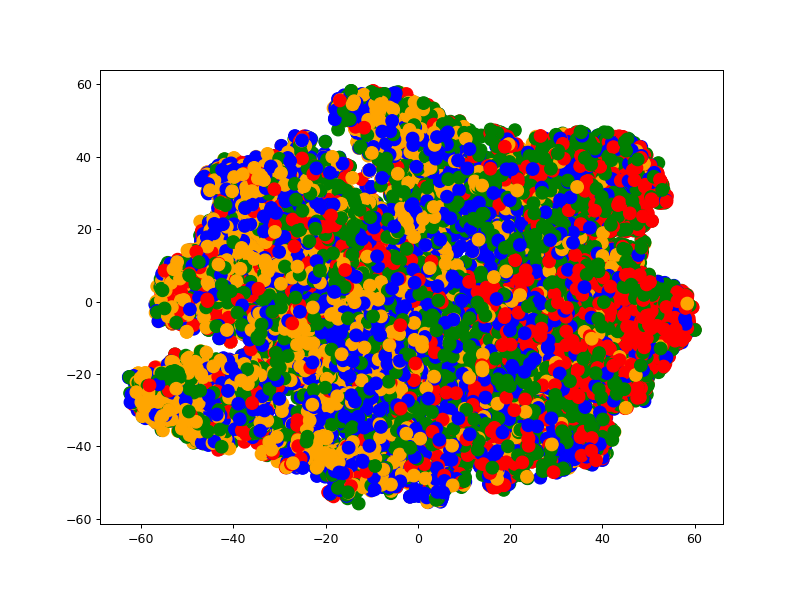

In [74]:
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt

colormap = numpy.array(['red', 'green', 'blue', 'orange'])

plt.scatter(fashion_tsne[:,0], fashion_tsne[:,1], s=100, c=colormap[y_test[:,0]])


In [53]:
import keras
fold_id = 'F1'  # F1, F2, F3, F4, F5
model_feat = {'F1':'f1', 'F2':'f2', 'F3':'f3','F4':'f4', 'F5':'f5'}
model_path = "/idiap/temp/tpurohit/ICASSP2022/Julian_Codes/raw_cnn/Set_0/Exp_2/Exp_set_2/exp/exp_"+model_feat[fold_id]+"/cnn_subseg_1/cnn.h5"

m = keras.models.load_model(model_path)
print(m.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 4000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 128)          3968      
_________________________________________________________________
activation_1 (Activation)    (None, 398, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 256)           327936    
_________________________________________________________________
activation_2 (Activation)    (None, 38, 256)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 256)          

In [62]:
### Get Posterior distribution
pred = m.predict(uttr_feat)
print(uttr_path)
print(numpy.mean(pred[:,0]),numpy.mean(pred[:,1]),numpy.mean(pred[:,2]),numpy.mean(pred[:,3]))

/idiap/resource/database/IEMOCAP/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_impro01/Ses05F_impro01_F018.wav
0.4754935 0.3392035 0.17343971 0.011863246


## Getting the Embeddings:

In [76]:
print(m.layers[13].name)
layer_name = m.layers[13].name
layer_output=m.get_layer(layer_name).output
intermediate_model=keras.models.Model(inputs=m.input,outputs=layer_output)
#print(intermediate_model.summary()) # Sanity Check print the model
intermediate_prediction=intermediate_model.predict(uttr_feat) 

In [82]:
print("Feature Space {} ; Embedding Space {} ".format(uttr_feat.shape,intermediate_prediction.shape))

Feature Space (156, 4000) ; Embedding Space (156, 10) 


In [84]:
print(intermediate_prediction[0])

[2.1050363  1.7652766  0.38625818 0.         3.5356665  2.8194
 0.         1.2137063  0.6589863  0.74594355]
